In [ ]:
# ĐỖ LÊ PHÁT TRIỂN-19146053

In [ ]:
# Khai báo và sử dụng các thư viện sau
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from sklearn.utils import validation 
from sklearn import preprocessing

11501568/11490434 [==============================] - 0s 0us/step


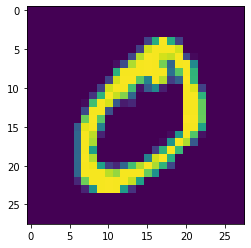

In [ ]:
# Sử dụng tập dữ liệu MNIST với bộ dữ liệu đã chia giữa phần train là 60000 và phần test là 10000
(x_train,y_train),(x_test,y_test)=mnist.load_data()
plt.imshow(x_train[1])
plt.show()

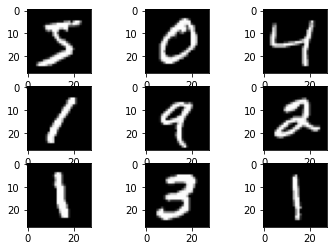

In [ ]:
for i in range(9):
  plt.subplot(330+i+1) 
  plt.imshow(x_train[i],cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
# Xử lý phần dữ liệu đã chia
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype ('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

In [ ]:
# Tạo mô hình
model=Sequential()
# Tạo lớp ẩn thứ nhất với 784 tín hiệu vào (784 hàng và 1 cột) và có 1024 tín hiệu ra sử dụng hàm relu
model.add(Dense(1024,activation='relu',input_shape=(784,)))
# Tạo lớp ẩn thứ hai với 1024 tín hiệu vào, 1024 tín hiệu ra (lấy tín hiệu vào là tín hiệu ra của lớp 1)
model.add(Dense(1024,activation='relu'))
# Tạo lớp ẩn thứ ba với 1024 tín hiệu vào, 10 tín hiệu ra
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 10)                10250     
                                                                 
Total params: 1,863,690
Trainable params: 1,863,690
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Biên dịch
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 500 lần học (epochs), mỗi lần học thì chỉ học 128 dữ liệu (batch_size), khi sai số không thay đổi trong 20 lần học thì sẽ dừng học ngay
history=model.fit(x_train,y_train,batch_size=128,epochs=500,verbose=1, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss',patience=20)])

Epoch 1/500
375/375 [==============================] - 18s 47ms/step - loss: 0.2405 - accuracy: 0.9250 - val_loss: 0.1248 - val_accuracy: 0.9625
Epoch 2/500
375/375 [==============================] - 19s 51ms/step - loss: 0.0853 - accuracy: 0.9741 - val_loss: 0.1214 - val_accuracy: 0.9672
Epoch 3/500
375/375 [==============================] - 19s 50ms/step - loss: 0.0557 - accuracy: 0.9835 - val_loss: 0.0951 - val_accuracy: 0.9768
Epoch 4/500
375/375 [==============================] - 19s 49ms/step - loss: 0.0419 - accuracy: 0.9874 - val_loss: 0.1144 - val_accuracy: 0.9751
Epoch 5/500
375/375 [==============================] - 19s 51ms/step - loss: 0.0305 - accuracy: 0.9910 - val_loss: 0.1084 - val_accuracy: 0.9773
Epoch 6/500
375/375 [==============================] - 17s 46ms/step - loss: 0.0259 - accuracy: 0.9926 - val_loss: 0.1305 - val_accuracy: 0.9772
Epoch 7/500
375/375 [==============================] - 18s 49ms/step - loss: 0.0232 - accuracy: 0.9932 - val_loss: 0.1291 - val_ac

In [ ]:
# Đánh giá độ chính xác của mô hình sau khi đã train 
Score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss',Score[0])
print('Test accuary', Score[1])

Test loss 0.23084546625614166
Test accuary 0.9822999835014343


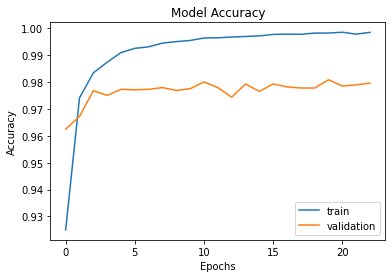

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show()

In [ ]:
# Chuyển sang pdf
from google.colab import drive
drive.mount('/content/drive')
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('MNIST.ipynb')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-fonts-recommended is already the newest version (2017.20180305-1).
texlive-generic-recommended is already the newest version (2017.20180305-1).
texlive-xetex is already the newest version (2017.20180305-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.
File ‘colab_pdf.py’ already there; not retrieving.





[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/MNIST.ipynb to pdf
[NbConvertApp] Support files will be in MNIST_files/
[NbConvertApp] Making directory ./MNIST_files
[NbConvertApp] Making directory ./MNIST_files
[NbConvertApp] Writing 60824 byte

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'